![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [32]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [33]:
# Start coding here
# Use as many cells as you need

# Hora con la mauor frecuanci ade crimen 
peak_crime_hour = (pd.to_numeric(crimes['TIME OCC'], errors='coerce') // 100).mode()[0]
print(f"Hora con mas crimenes: {peak_crime_hour}:00")


Hora con mas crimenes: 12:00


In [34]:
#area con la mayor frecuencia de crimenes en la noche, definir 10 pm a 3:59 pm como noche 
crimes["TIME OCC"] = crimes["TIME OCC"].astype(str).str.zfill(4)
crimes["hour"] = crimes["TIME OCC"].str[:2].astype(int) # hacemos una variable lalmada hora que extraiga los dos primeros digitos
night_crimes = crimes[(crimes["hour"] >= 22) | (crimes["hour"] <= 3)]
# creamos un dataset con las crimenes entre esas horas 
peak_night_crime_location = night_crimes["AREA NAME"].value_counts().idxmax()
print("Área con más crímenes nocturnos:", peak_night_crime_location)

Área con más crímenes nocturnos: Central


In [35]:
# 3 - crimenes cometidos a diferentes grupos de edades
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')] # creamos los bins 
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"] #Creamos los grupos para crear una variable con estos grupos
crimes["age_group"] = pd.cut(crimes["Vict Age"], bins=bins, labels=labels, right=True) 
victim_ages = crimes["age_group"].value_counts().sort_index()  # se cuenta la frecuencia 
print(victim_ages)



0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: age_group, dtype: int64


### Areas con mas crimen 

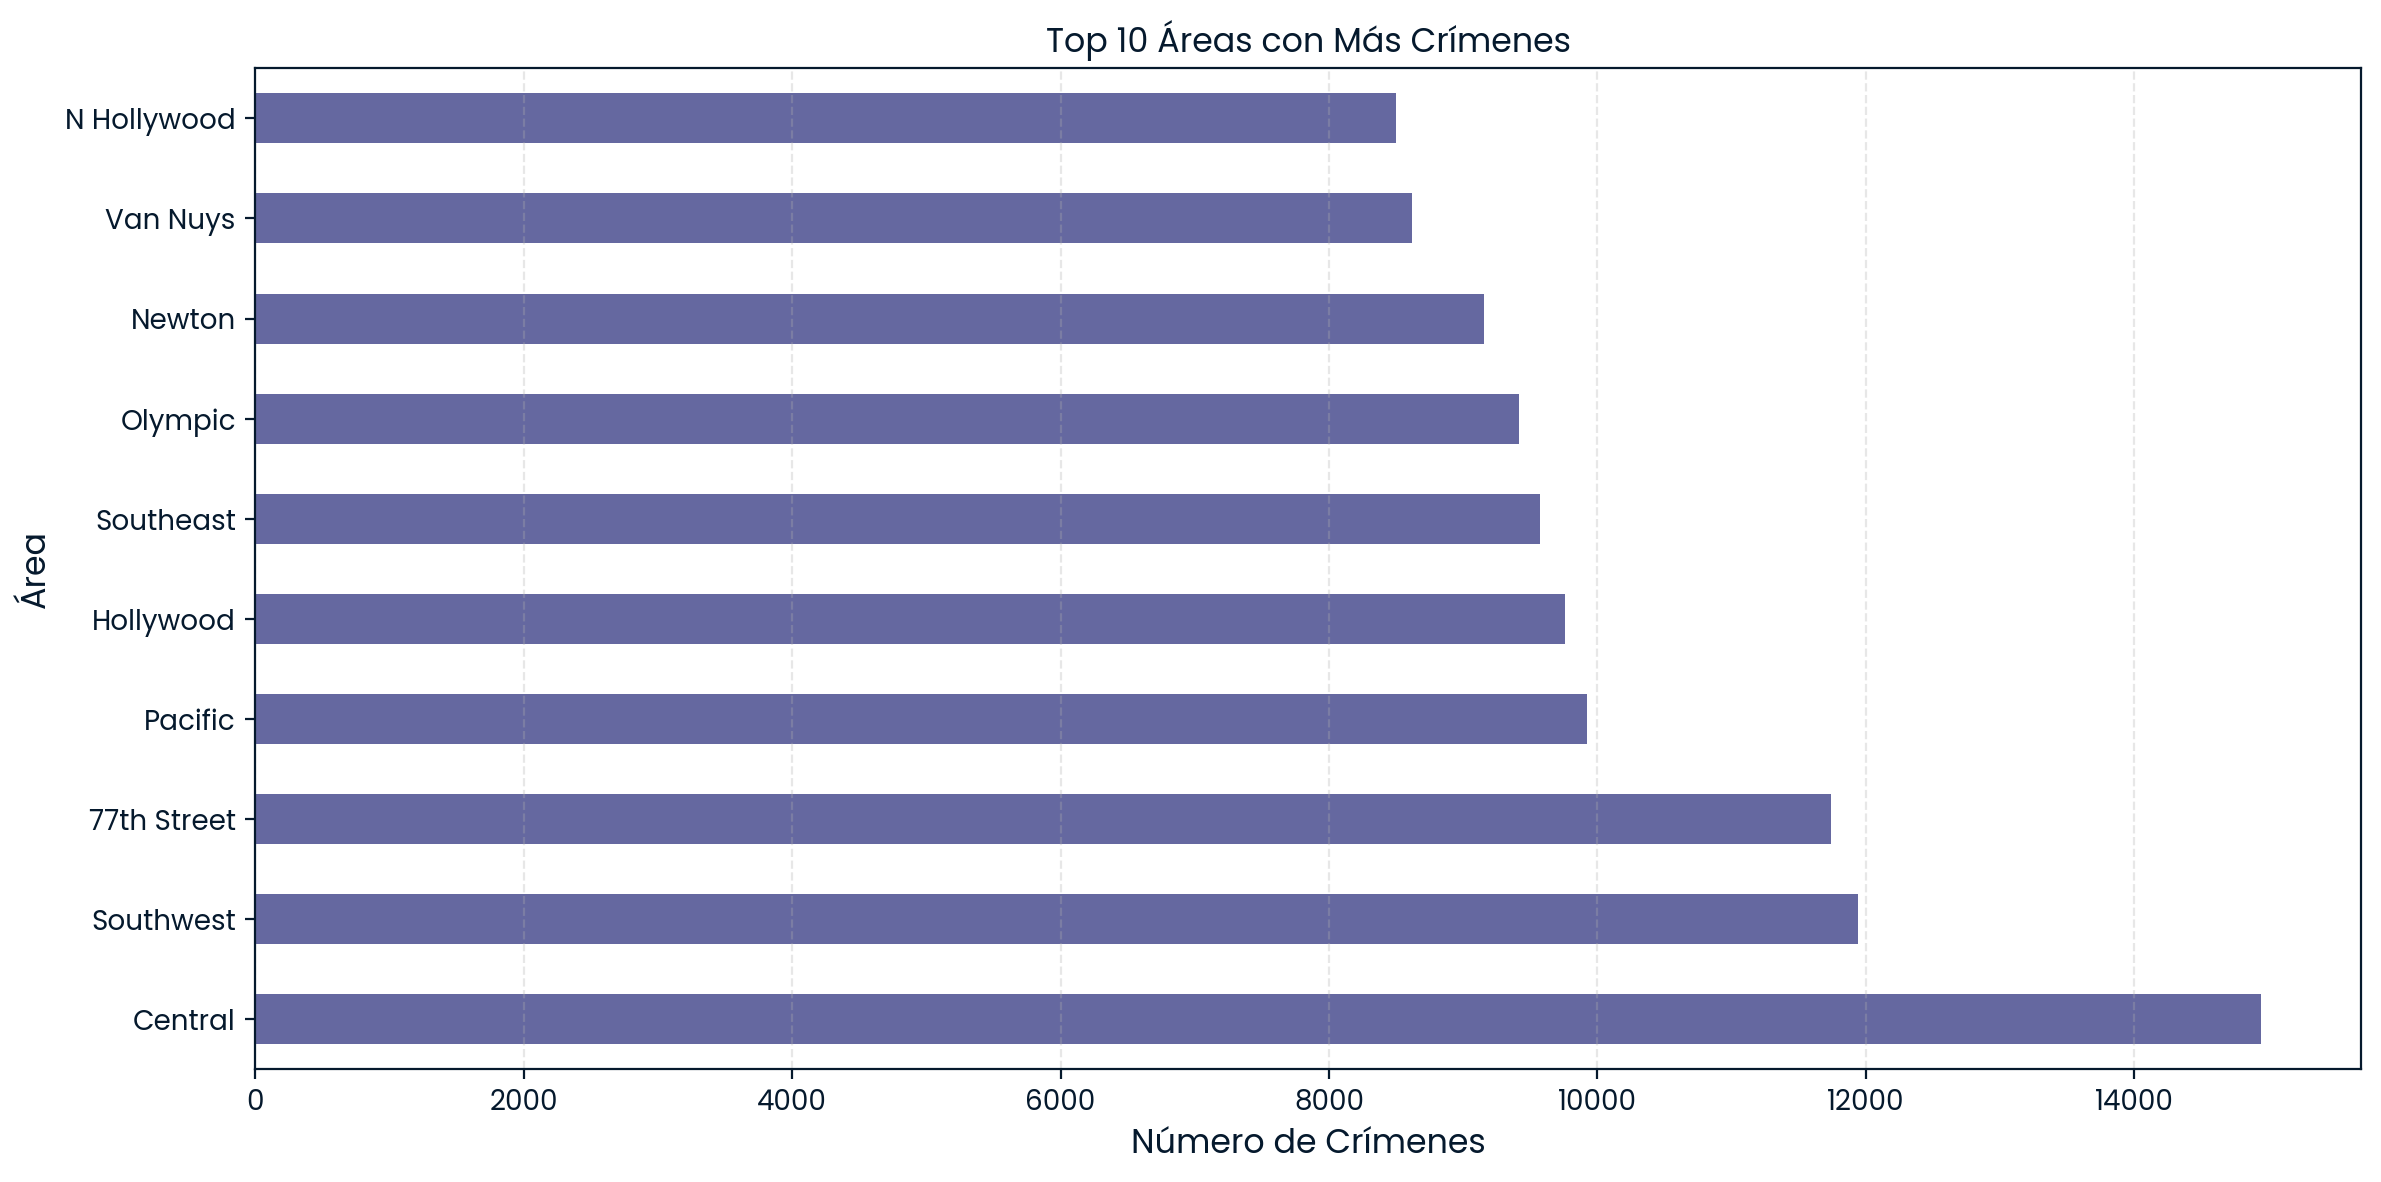


Top 10 áreas:
1. Central: 14,944 crímenes
2. Southwest: 11,945 crímenes
3. 77th Street: 11,739 crímenes
4. Pacific: 9,923 crímenes
5. Hollywood: 9,762 crímenes
6. Southeast: 9,571 crímenes
7. Olympic: 9,414 crímenes
8. Newton: 9,152 crímenes
9. Van Nuys: 8,621 crímenes
10. N Hollywood: 8,502 crímenes


In [36]:
#Grafica de area con mas crimenes
import matplotlib.pyplot as plt

# Top 10 áreas con más crímenes
top_areas = crimes["AREA NAME"].value_counts().head(10)

# Crear la gráfica
plt.figure(figsize=(12, 6))
top_areas.plot(kind='barh')
plt.title('Top 10 Áreas con Más Crímenes')
plt.xlabel('Número de Crímenes', fontsize=12)
plt.ylabel('Área', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()

plt.show()

print("\nTop 10 áreas:")
for i, (area, count) in enumerate(top_areas.items(), 1):
    print(f"{i}. {area}: {count:,} crímenes")

### Analisis temporal de los crimenes

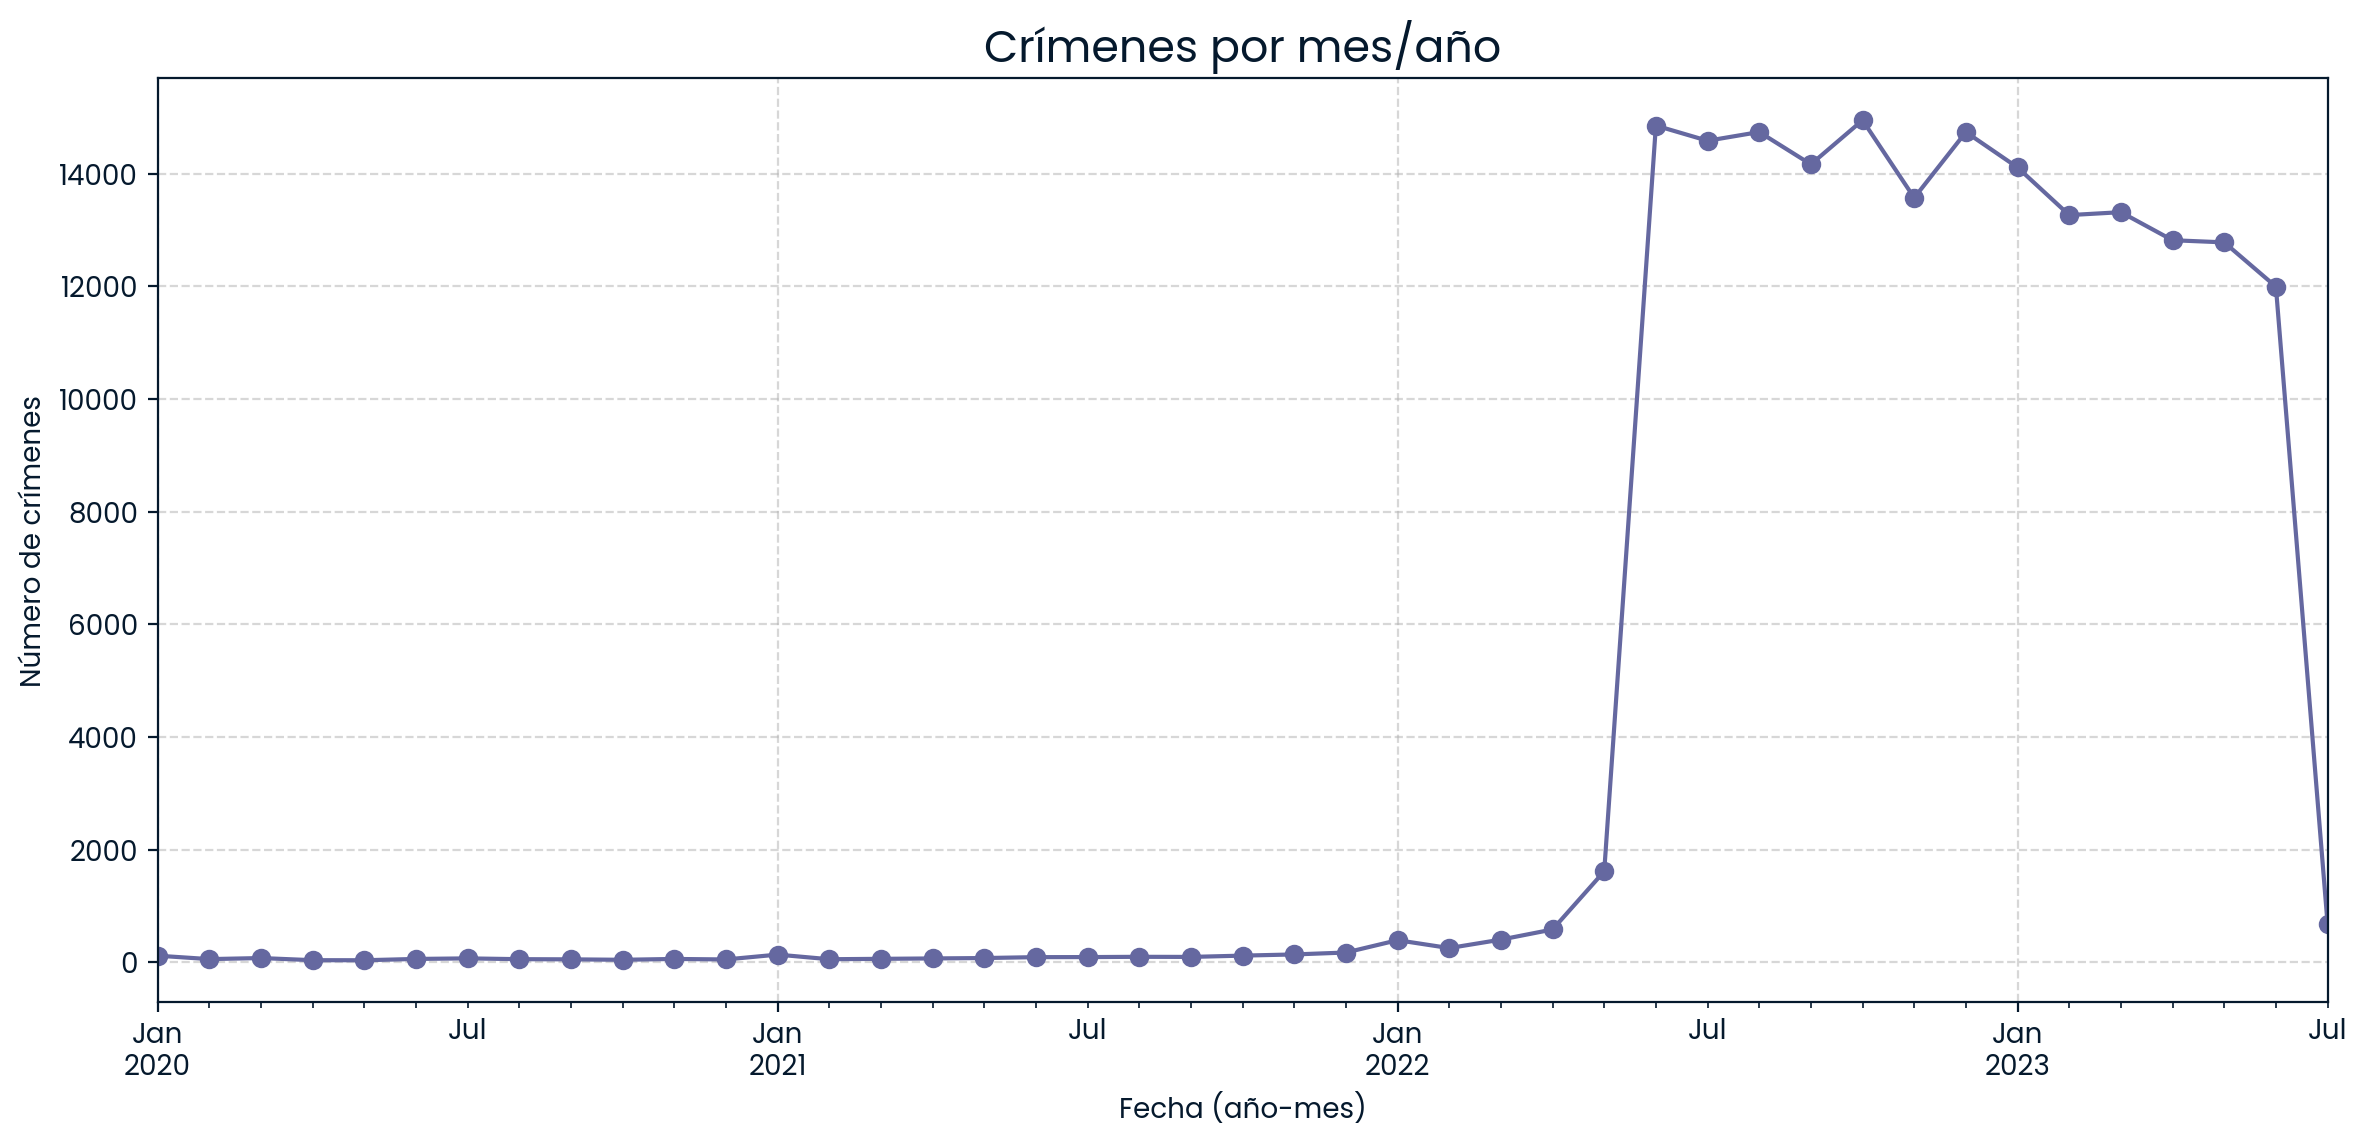

In [37]:
import seaborn as sns
# Asegurar que la fecha es tipo datetime
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])

# Crear columnas de año y mes
crimes['year'] = crimes['DATE OCC'].dt.year
crimes['month'] = crimes['DATE OCC'].dt.month
crimes['day_of_week'] = crimes['DATE OCC'].dt.day_name()

# Crímenes por año/mes 
crimes['year_month'] = crimes['DATE OCC'].dt.to_period('M')
monthly_crimes = crimes.groupby('year_month').size()

plt.figure(figsize=(14,6))
monthly_crimes.plot(kind='line', marker='o')
plt.title("Crímenes por mes/año", fontsize=16)
plt.xlabel("Fecha (año-mes)")
plt.ylabel("Número de crímenes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


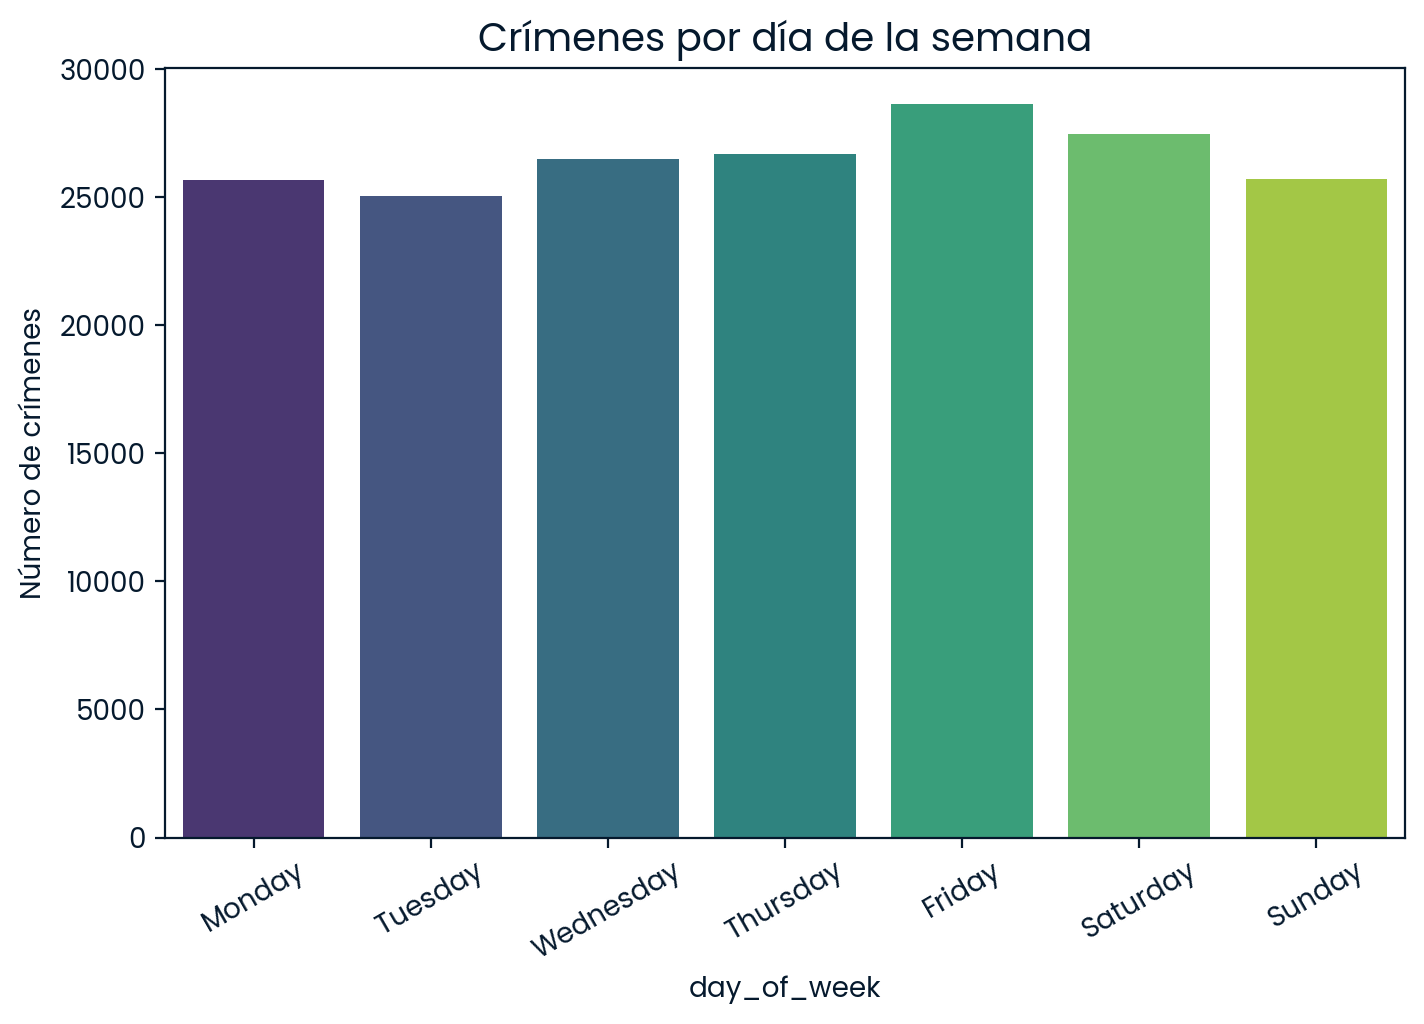

In [38]:
# crimenes por dia de la semana 
plt.figure(figsize=(8,5))
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(data=crimes, x='day_of_week', order=order_days, palette="viridis")
plt.title("Crímenes por día de la semana", fontsize=14)
plt.ylabel("Número de crímenes")
plt.xticks(rotation=30)
plt.show()

## Observamos que la mayoria de los crimenes son cometidos los dias viernes y sabdo y deciende el dia domingo